## Importing packages

In [1]:
# EDA packages
import pandas as pd
import numpy as np

In [2]:
# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

C:\Users\User\AppData\Local\Temp\ipykernel_20436\275141996.py:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# ML Packages

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [4]:
# load our dataset
df = pd.read_excel("iris.xls")
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# To check for any missing values
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [7]:
df.keys()

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [8]:
df.values

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [9]:
df.shape

(150, 5)

In [10]:
# Species distribution
print(df.groupby('Classification').size())

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## EDA 

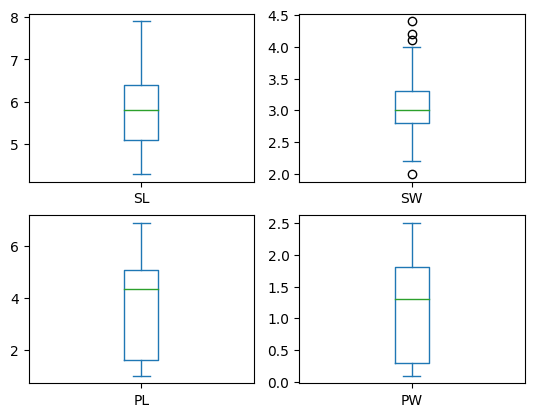

In [11]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

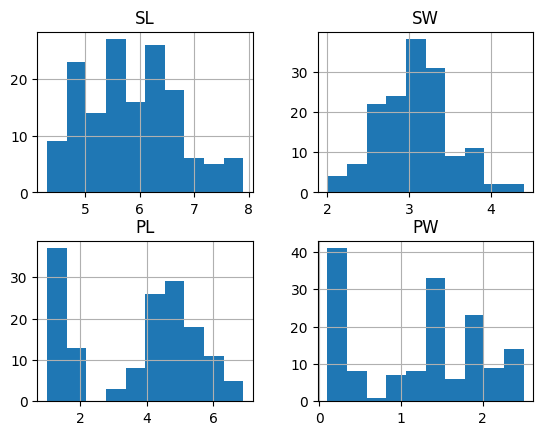

In [12]:
# histograms using pandas plot
df.hist()
plt.show()

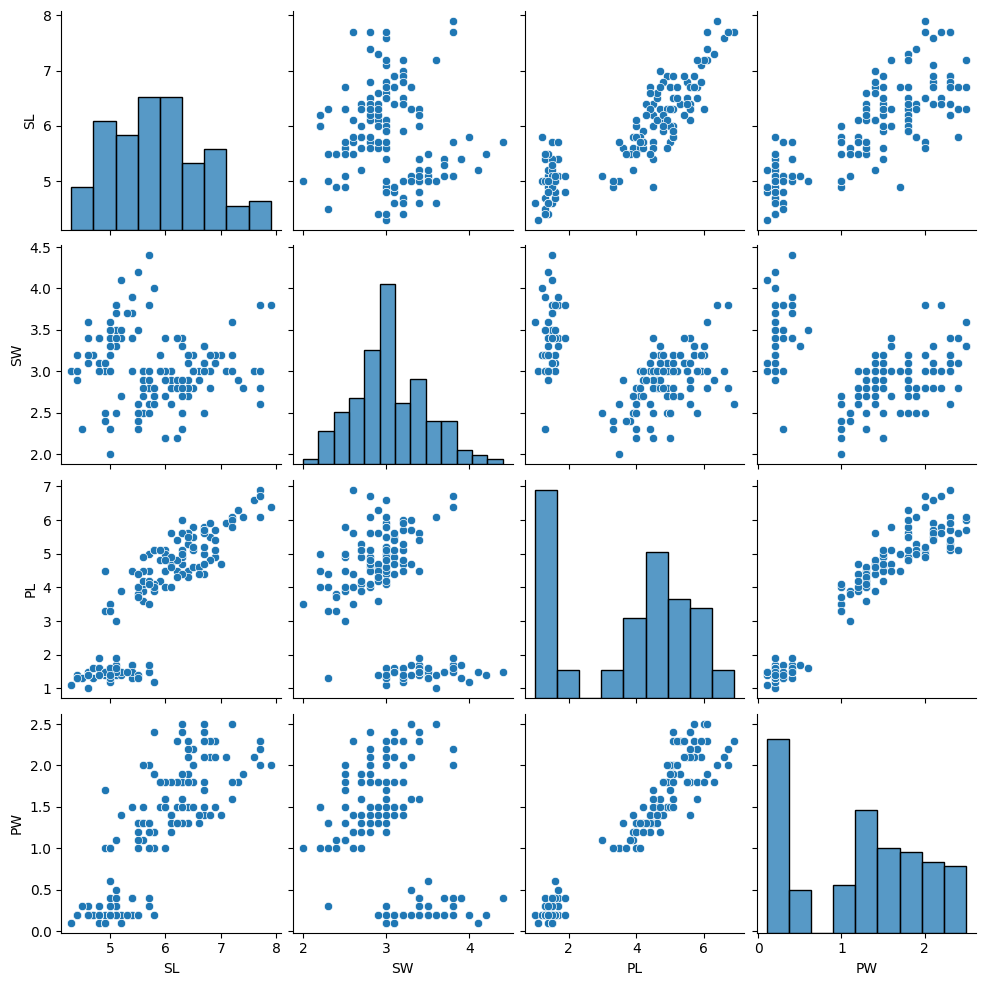

In [13]:
# Multivariate Plots
# Relationships between each attribute
sns.pairplot(df)

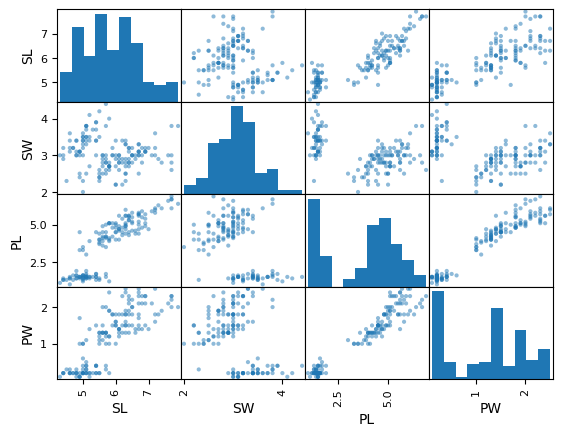

In [14]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_20436\1091522099.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot =True)


<AxesSubplot: >

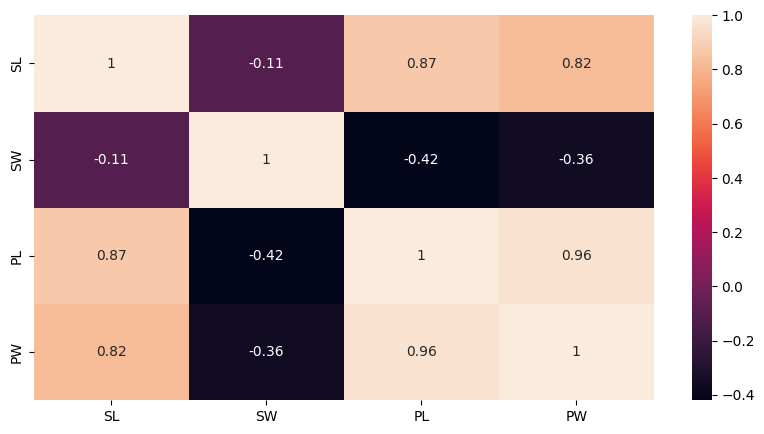

In [15]:
plt.figure(figsize =(10,5))
sns.heatmap(df.corr(), annot =True)

In [16]:

# label encoding
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Classification']= label_encoder.fit_transform(df['Classification'])
  
df['Classification'].unique()

array([0, 1, 2])

In [17]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Machine Learning Models

In [18]:
# Split-out validation dataset
array = df.values
x = array[:,0:4]
y = array[:,4]
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [19]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [20]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
x_test

In [ ]:
y_test

## Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
logistic_model = LogisticRegression(random_state = 0)
logistic_model.fit(x_train, y_train)

In [ ]:
y_predict =logistic_model.predict(x_test)
y_predict

In [ ]:
cm = confusion_matrix(y_test,y_predict)

In [ ]:
sns.heatmap(cm ,annot=True)

In [ ]:
print(classification_report(y_test,y_predict))

In [ ]:
print("accuracy :" , logistic_model.score(x_test,y_test))

In [ ]:
# Individual Prediction
mysample = np.array([4.9,3.0,1.4,0.2])
ex1 = mysample.reshape(1,-1)
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
logistic_model.predict(ex1)

In [ ]:
ex2 = np.array([6.2,3.4,5.4,2.3]).reshape(1,-1)

In [ ]:
logistic_model.predict(ex2)

## KNN, Descision Tree and SVM models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
svm = SVC() 

In [ ]:
# Fit the model
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
print("accuracy :" , knn_model.score(x_test,y_test))

In [ ]:

k = 6

neigh6 = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)

yhat6 = neigh6.predict(x_test)

print("Train set Accuracy: ", accuracy_score(y_train, neigh6.predict(x_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat6))

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [ ]:
k = 8

neigh6 = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)

yhat6 = neigh6.predict(x_test)

print("Train set Accuracy: ", accuracy_score(y_train, neigh6.predict(x_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat6))

In [ ]:
dtree.fit(x_train, y_train)
print("accuracy :" , dtree.score(x_test,y_test))

In [ ]:
svm.fit(x_train, y_train)
print("accuracy :" , svm.score(x_test,y_test))

In [ ]:
print("----------------------ACCURACY---------------------")
print("KNN(K=8): ", accuracy_score(y_test, yhat6))
print("DECISION TREE :" , dtree.score(x_test,y_test))
print("SVM :" , svm.score(x_test,y_test))
print("lOGISTIC REGRESSION :" , logistic_model.score(x_test,y_test))

In [ ]:
# <!-- All these four models give good accuracy. Hence we choose "Logistic Regression model" 

In [ ]:
import pickle

In [ ]:
logit_model_pkl = open('logit_model_iris.pkl','wb')
pickle.dump(logistic_model,logit_model_pkl)
logit_model_pkl.close()

In [ ]:
#create label encoder pickle
# serializing label encoder
le_pkl = open('le.pkl','wb')
pickle.dump(label_encoder, le_pkl)
le_pkl.close()